<a href="https://colab.research.google.com/github/KoderSamy/Math/blob/main/%D0%9B%D1%801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Корни уравнения 0=exp(-x)-2(x-1)^2:
Метод: Бисекция, Корень: 0.429534912109375, Итерации: 14
Метод: Ньютон, Корень: 0.42956502971524685, Итерации: 2
Метод: Хорды, Корень: 0.42956503407055713, Итерации: 8
Метод: Бисекция, Корень: 2.999969482421875, Итерации: 14
Метод: Ньютон, Корень: 1.3585009299256414, Итерации: 4
Метод: Хорды, Корень: 1.3585009220187942, Итерации: 6


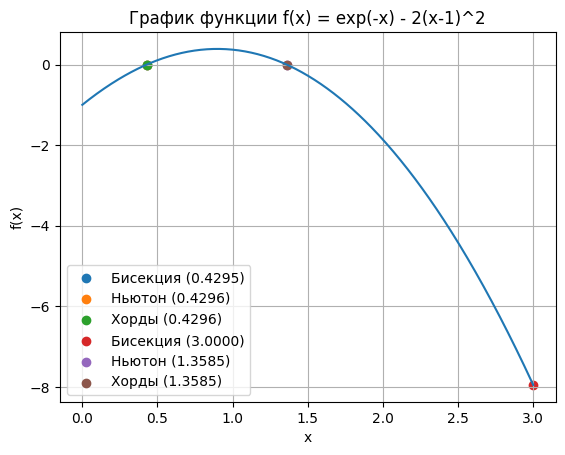

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def bisection(f, a, b, eps):
    """Метод бисекции."""
    iterations = 0
    while abs(b - a) > eps:
        c = (a + b) / 2
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return (a + b) / 2, iterations

def newton(f, df, x0, eps):
    """Метод Ньютона."""
    iterations = 0
    x = x0
    while True:
        x_next = x - f(x) / df(x)
        if abs(x_next - x) < eps:
            return x_next, iterations
        x = x_next
        iterations += 1

def secant(f, x0, x1, eps):
    """Метод хорд."""
    iterations = 0
    x = x0
    x_next = x1
    while True:
        temp = x_next
        x_next = x_next - f(x_next) * (x_next - x) / (f(x_next) - f(x))
        x = temp
        if abs(x_next - x) < eps:
            return x_next, iterations
        iterations += 1

# Определение функции и ее производной
def f(x):
    return math.exp(-x) - 2*(x - 1)**2

def df(x):
    return -math.exp(-x) - 4*(x - 1)

# Параметры
eps = 0.0001

# Поиск корней.  Важно:  для этого уравнения нужно подобрать отрезки,
# на которых находятся корни, аналитически или графически.
segments = [(0, 1), (2, 3)] # Примерные отрезки, содержащие корни


roots = []
for segment in segments:
    a, b = segment
    root_bisection, iterations_bisection = bisection(f, a, b, eps)
    roots.append(("Бисекция", root_bisection, iterations_bisection))

    x0 = (a + b) / 2  #  Начальное приближение для Ньютона
    root_newton, iterations_newton = newton(f, df, x0, eps)
    roots.append(("Ньютон", root_newton, iterations_newton))

    root_secant, iterations_secant = secant(f, a, b, eps)
    roots.append(("Хорды", root_secant, iterations_secant))



# Вывод результатов
print("Корни уравнения 0=exp(-x)-2(x-1)^2:")
for method, root, iterations in roots:
  print(f"Метод: {method}, Корень: {root}, Итерации: {iterations}")



# Построение графика для визуализации
x_vals = np.linspace(0, 3, 500)  # Создаем массив значений x для графика
y_vals = [f(x) for x in x_vals]  # Вычисляем значения y для каждого x

plt.plot(x_vals, y_vals)  # Строим график функции
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("График функции f(x) = exp(-x) - 2(x-1)^2")
plt.grid(True)

for method, root, iterations in roots:
  plt.scatter(root, f(root), label=f"{method} ({root:.4f})")


plt.legend()
plt.show()